In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log

from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value,
                           Set)

coefficients c_i
[4.87693771244517, 1141.7575496990298, 14.68969876440588]


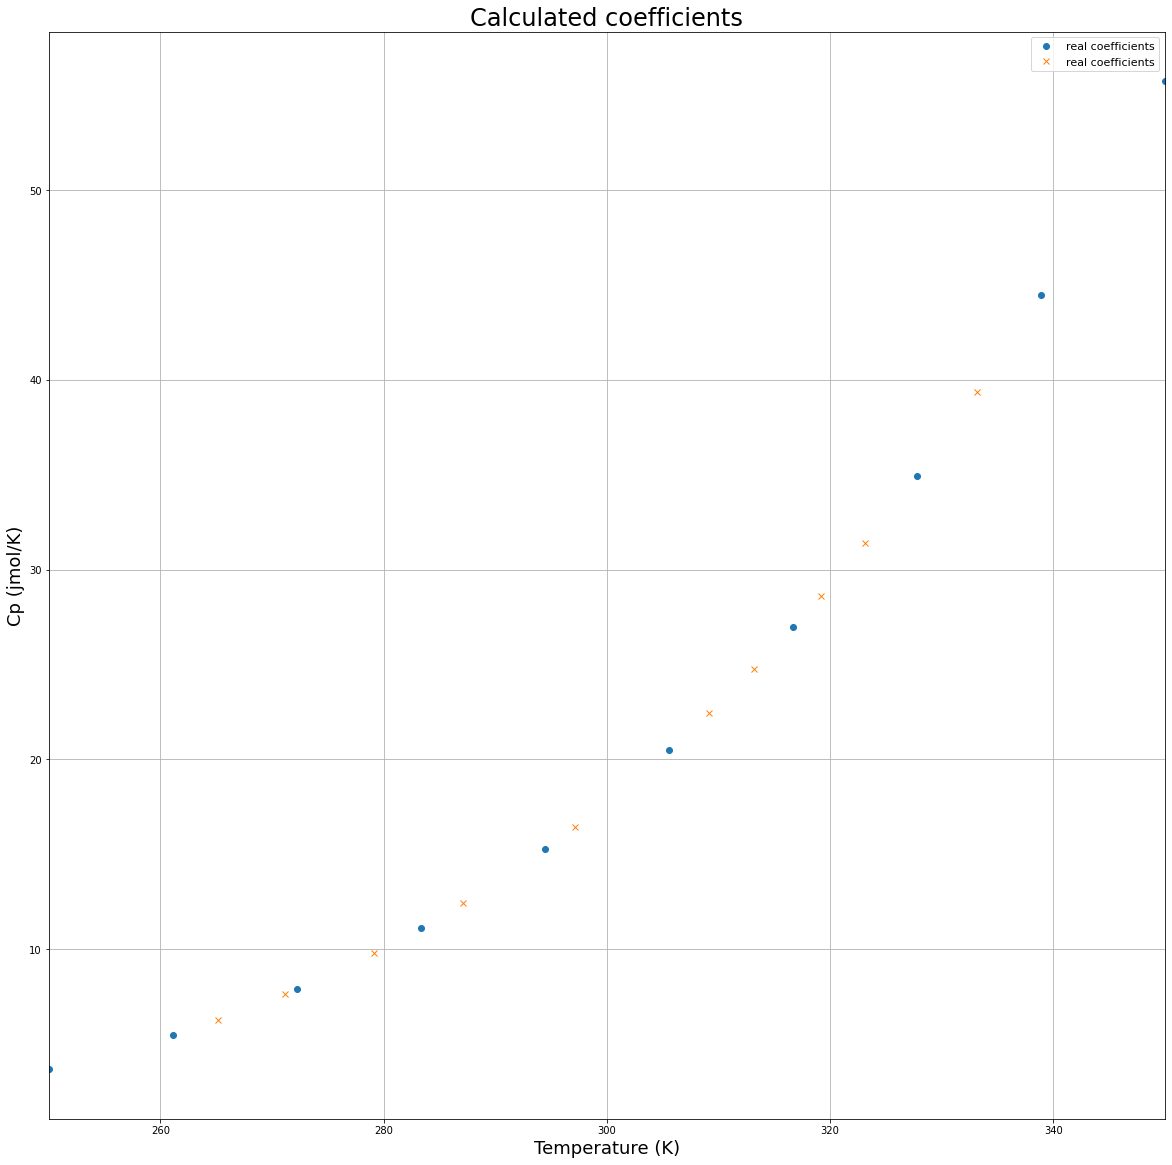

In [9]:
P = {'1':6.24, 
      '2':7.62,
      '3':9.81,
      '4':12.45,
      '5':16.45, 
      '6':22.45, 
      '7':24.78, 
      '8':28.62, 
      '9':31.41, 
      '10':39.33
      }

TEMP = {'1':-8+273.15, 
      '2':-2+273.15,
      '3':6+273.15,
      '4':14+273.15,
      '5':24+273.15, 
      '6':36+273.15, 
      '7':40+273.15, 
      '8':46+273.15, 
      '9':50+273.15, 
      '10':60+273.15
      }

# Set the model
model = ConcreteModel()

## Sets
Coeff = ['A','B','C']
Meass = ['1','2','3','4','5','6','7','8','9','10']
# Craete PYOMO set of coefficients used for Shomate equation
model.C = Set(initialize=Coeff)
model.M = Set(initialize=Meass)
## Create variables for coefficients, bound them and initialize it
# Initialize with methane values
ci = {'A' :1,
        'B' : 1,
        'C' :1
        }

# Finish variable coefficients
model.c_i = Var(model.C, bounds=(0,1500), initialize=ci)

## Create variables for cps, bound them and initialize it
# Initialize with methane values
# Finish variable coefficients
model.P = Var(model.M, bounds=(0,100), initialize=P)

# Create a constraint for gibbs free energy to make it dependent on Temperature for each specie
def antoine_rule(model, i):
    return (10**(model.c_i['A'] -
                    model.c_i['B']/
                    (TEMP[i]+model.c_i['C']))
                    == model.P[i])
    

model.Ps = Constraint(model.M, rule=antoine_rule)

## Objective Function
def obj_expression(model):
    return sum((P[i]-model.P[i])**2 for i in model.M)
# objective = Objective(rule, minimize or optimize)
model.obj = Objective(rule=obj_expression)

# Tell PYOMO what solver to use
# Using ipopt do to nonlinearities
opt = SolverFactory('ipopt')

# opt_success = opt.solve(model, tee=True) # To print solver intermidiate steps
opt_success = opt.solve(model)
# Display model
# model.display()

print("coefficients", model.c_i)

T = np.linspace(100, 300, num=10)

coeff = [value(model.c_i['A']),value(model.c_i['B']),value(model.c_i['C'])]
calcP = 10**(coeff[0] -
                    (coeff[1]/
                    (T+coeff[2])))
calcP4=calcP

print(coeff)

# # Plot the Charge
fig = plt.figure(figsize=(20,20))
plt.plot(T,calcP,'k--',label="real coefficients")
plt.plot(TEMP.values(),P.values(),'x',label="real coefficients")
# # Add legend
plt.legend(fontsize=11)
plt.xlabel('Temperature (K)',fontsize=18)
plt.ylabel('Cp (jmol/K)',fontsize=18)
# plt.xlim(0,1400)
# plt.ylim(0,100)
plt.title("Calculated coefficients",fontsize=24)
plt.grid(True)
plt.show()

coefficients c_i
[4.693213941062347, 1033.3047973891155, 4.342345089455471e-05]


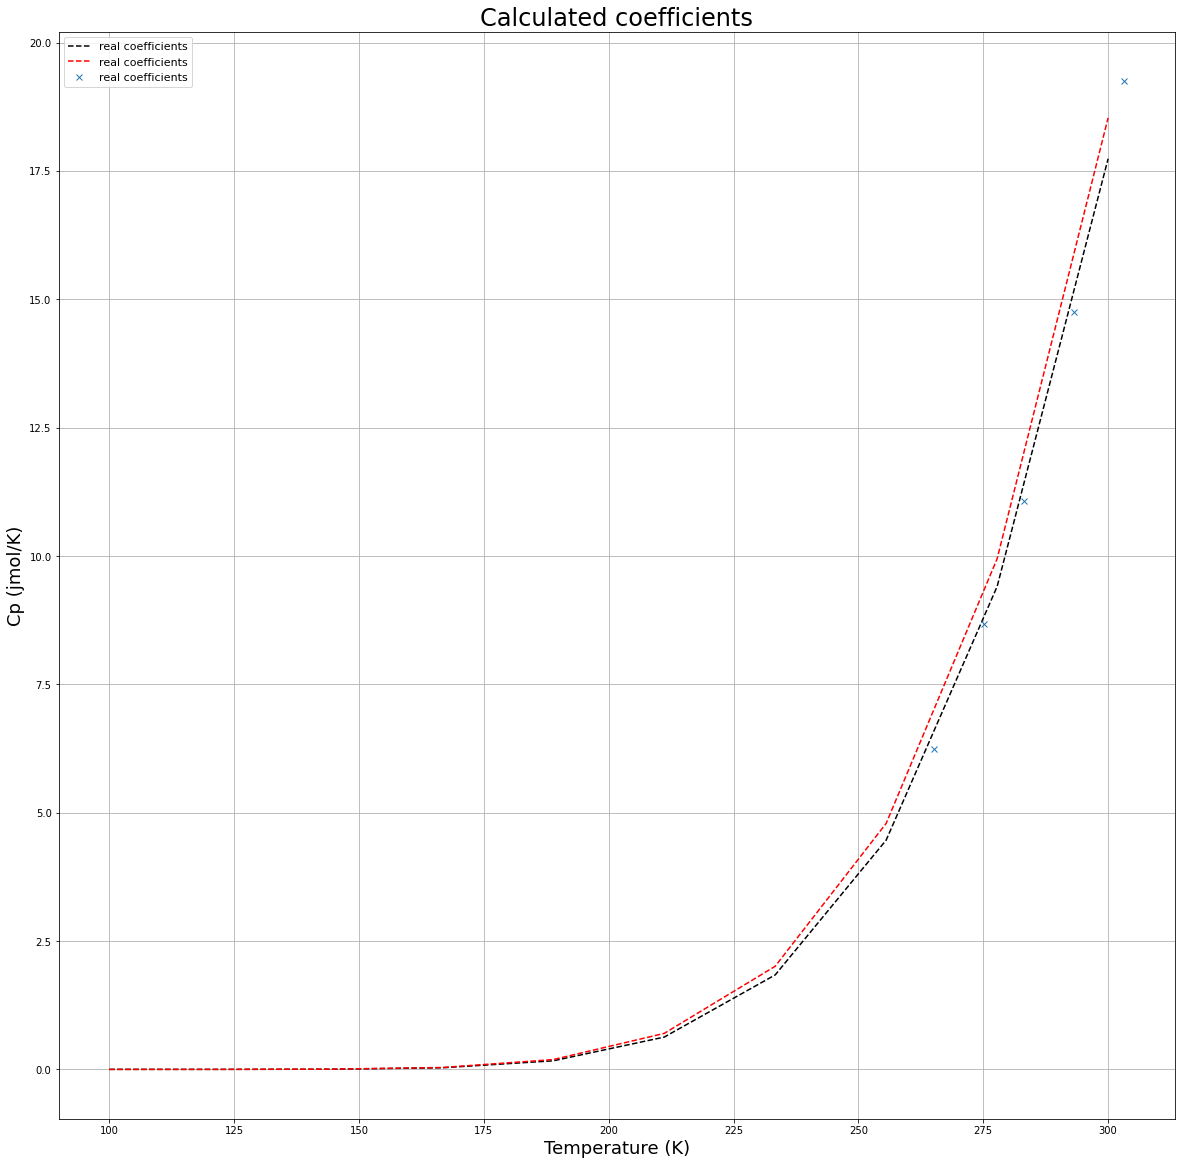

In [5]:
P = {'1':6.24100, 
      '2':8.66500,
      '3':11.07000,
      '4':14.75000,
      '5':19.25000
      }

TEMP = {'1':265.15, 
      '2':275.15,
      '3':283.15,
      '4':293.15,
      '5':303.15
      }

# Set the model
model = ConcreteModel()

## Sets
Coeff = ['A','B','C']
Meass = ['1','2','3','4','5']
# Craete PYOMO set of coefficients used for Shomate equation
model.C = Set(initialize=Coeff)
model.M = Set(initialize=Meass)
## Create variables for coefficients, bound them and initialize it
# Initialize with methane values
ci = {'A' :1,
        'B' : 1,
        'C' :1
        }

# Finish variable coefficients
model.c_i = Var(model.C, bounds=(0,1500), initialize=ci)

## Create variables for cps, bound them and initialize it
# Initialize with methane values
# Finish variable coefficients
model.P = Var(model.M, bounds=(0,100), initialize=P)

# Create a constraint for gibbs free energy to make it dependent on Temperature for each specie
def antoine_rule(model, i):
    return (10**(model.c_i['A'] -
                    model.c_i['B']/
                    (TEMP[i]+model.c_i['C']))
                    == model.P[i])
    

model.Ps = Constraint(model.M, rule=antoine_rule)

## Objective Function
def obj_expression(model):
    return sum((P[i]-model.P[i])**2 for i in model.M)
# objective = Objective(rule, minimize or optimize)
model.obj = Objective(rule=obj_expression)

# Tell PYOMO what solver to use
# Using ipopt do to nonlinearities
opt = SolverFactory('ipopt')

# opt_success = opt.solve(model, tee=True) # To print solver intermidiate steps
opt_success = opt.solve(model)
# Display model
# model.display()

print("coefficients", model.c_i)

T = np.linspace(250, 350, num=10)

coeff = [value(model.c_i['A']),value(model.c_i['B']),value(model.c_i['C'])]
calcP2 = 10**(coeff[0] -
                    (coeff[1]/
                    (T+coeff[2])))
calcP4=calcP

print(coeff)

# # Plot the Charge
fig = plt.figure(figsize=(20,20))
plt.plot(T,calcP2,'k--',label="real coefficients")
plt.plot(T,calcP,'r--',label="real coefficients")
plt.plot(TEMP.values(),P.values(),'x',label="real coefficients")
# # Add legend
plt.legend(fontsize=11)
plt.xlabel('Temperature (K)',fontsize=18)
plt.ylabel('Cp (jmol/K)',fontsize=18)
plt.xlim(250,350)
# plt.ylim(0,100)
plt.title("Calculated coefficients",fontsize=24)
plt.grid(True)
plt.show()

coefficients c_i
[4.550687909371708, 1017.2097408257265, 8.304234031723335e-05]


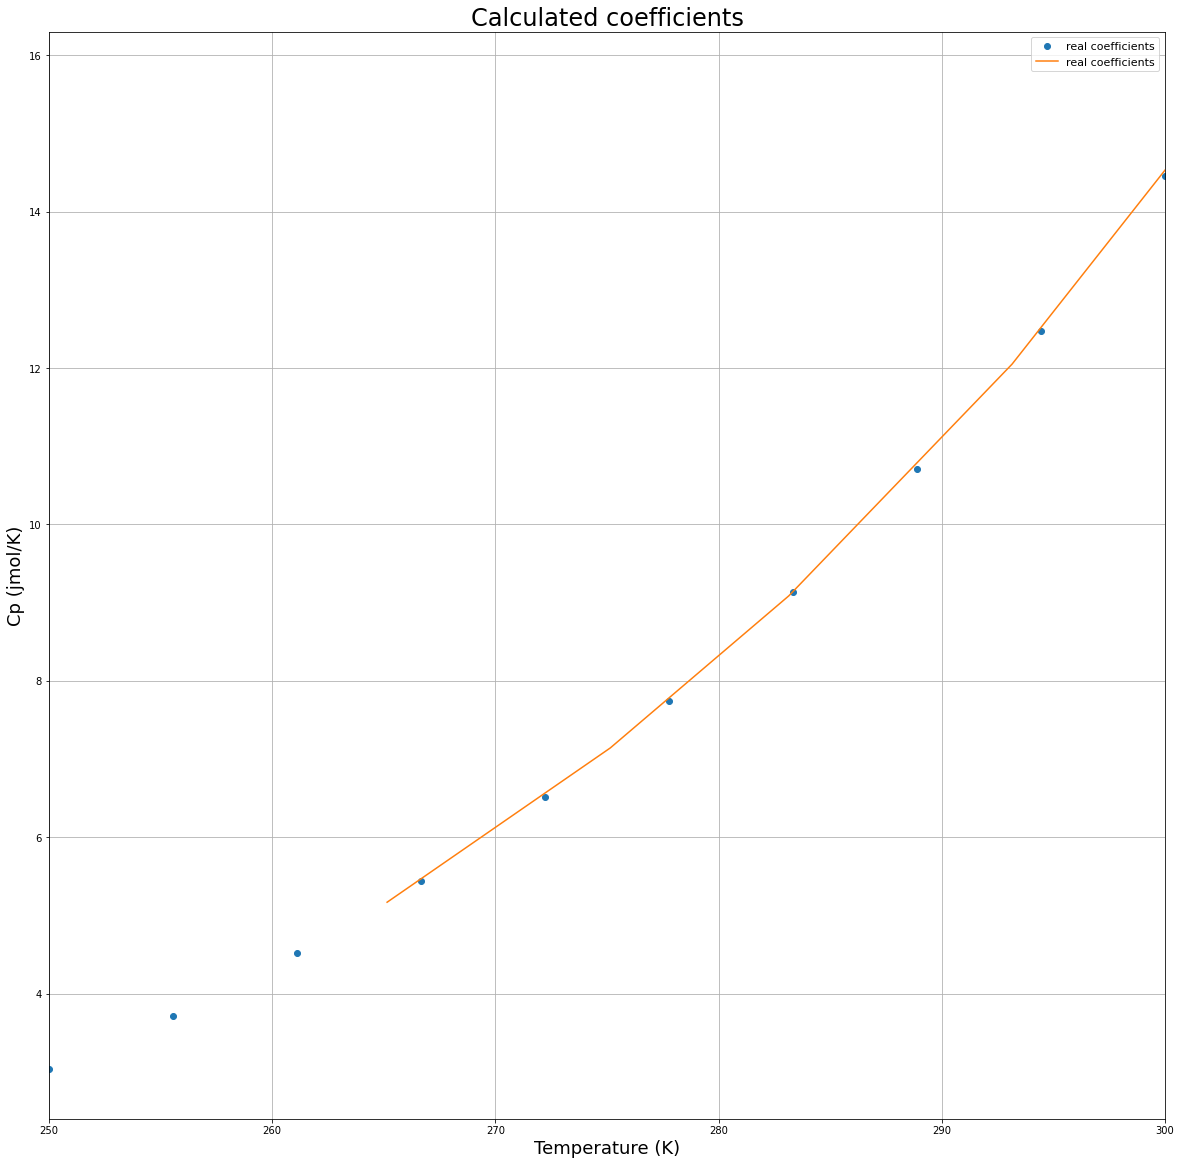

In [13]:
P = {'1':5.17000, 
      '2':7.14300,
      '3':9.08800,
      '4':12.05000,
      '5':15.67000
      }

TEMP = {'1':265.15, 
      '2':275.15,
      '3':283.15,
      '4':293.15,
      '5':303.15
      }

# Set the model
model = ConcreteModel()

## Sets
Coeff = ['A','B','C']
Meass = ['1','2','3','4','5']
# Craete PYOMO set of coefficients used for Shomate equation
model.C = Set(initialize=Coeff)
model.M = Set(initialize=Meass)
## Create variables for coefficients, bound them and initialize it
# Initialize with methane values
ci = {'A' :1,
        'B' : 1,
        'C' :1
        }

# Finish variable coefficients
model.c_i = Var(model.C, bounds=(0,1500), initialize=ci)

## Create variables for cps, bound them and initialize it
# Initialize with methane values
# Finish variable coefficients
model.P = Var(model.M, bounds=(0,100), initialize=P)

# Create a constraint for gibbs free energy to make it dependent on Temperature for each specie
def antoine_rule(model, i):
    return (10**(model.c_i['A'] -
                    model.c_i['B']/
                    (TEMP[i]+model.c_i['C']))
                    == model.P[i])
    

model.Ps = Constraint(model.M, rule=antoine_rule)

## Objective Function
def obj_expression(model):
    return sum((P[i]-model.P[i])**2 for i in model.M)
# objective = Objective(rule, minimize or optimize)
model.obj = Objective(rule=obj_expression)

# Tell PYOMO what solver to use
# Using ipopt do to nonlinearities
opt = SolverFactory('ipopt')

# opt_success = opt.solve(model, tee=True) # To print solver intermidiate steps
opt_success = opt.solve(model)
# Display model
# model.display()

print("coefficients", model.c_i)

T = np.linspace(250, 300, num=10)

coeff = [value(model.c_i['A']),value(model.c_i['B']),value(model.c_i['C'])]
calcP2 = 10**(coeff[0] -
                    (coeff[1]/
                    (T+coeff[2])))
calcP4=calcP

print(coeff)

# # Plot the Charge
fig = plt.figure(figsize=(20,20))
plt.plot(T,calcP2,'o',label="real coefficients")
# plt.plot(T,calcP,'r--',label="real coefficients")
plt.plot(TEMP.values(),P.values(),'-',label="real coefficients")
# # Add legend
plt.legend(fontsize=11)
plt.xlabel('Temperature (K)',fontsize=18)
plt.ylabel('Cp (jmol/K)',fontsize=18)
plt.xlim(250,300)
# plt.ylim(0,100)
plt.title("Calculated coefficients",fontsize=24)
plt.grid(True)
plt.show()